In [6]:
import pandas as pd

countries = pd.read_csv("countries (1).csv", index_col=0)

countries

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


In [7]:
countries.loc[['KR', 'US']]

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825


In [10]:
countries.iloc[2:, :]

,country,area,capital,population
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


In [14]:
import pandas as pd

weather = pd.read_csv("weather (3).csv ", encoding='cp949')

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3653 non-null   object 
 1   평균기온    3653 non-null   float64
 2   최대풍속    3649 non-null   float64
 3   평균풍속    3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [15]:
weather.describe()

,평균기온,최대풍속,평균풍속
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [23]:
weather.corr

<bound method DataFrame.corr of               일시  평균기온  최대풍속  평균풍속
0     2010-08-01  28.7   8.3   3.4
1     2010-08-02  25.2   8.7   3.8
2     2010-08-03  22.1   6.3   2.9
3     2010-08-04  25.3   6.6   4.2
4     2010-08-05  27.2   9.1   5.6
...          ...   ...   ...   ...
3648  2020-07-27  22.1   4.2   1.7
3649  2020-07-28  21.9   4.5   1.6
3650  2020-07-29  21.6   3.2   1.0
3651  2020-07-30  22.9   9.7   2.4
3652  2020-07-31  25.7   4.8   2.5

[3653 rows x 4 columns]>

### filtering

In [29]:
weather['month'] = pd.DatetimeIndex(weather['일시']).month

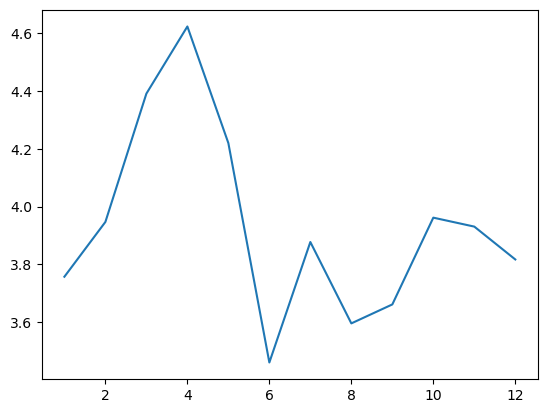

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
# weather['month'] = [int(date.split('-')[1])for date in weather['일시']]
weather['month'] = pd.DatetimeIndex(weather['일시']).month

avg_month_wind = []
for i in range(1, 13):
    avg_month_wind.append(weather[weather['month']==i]['평균풍속'].mean())
avg_month_wind

plt.plot(range(1, 13), avg_month_wind)
plt.show()

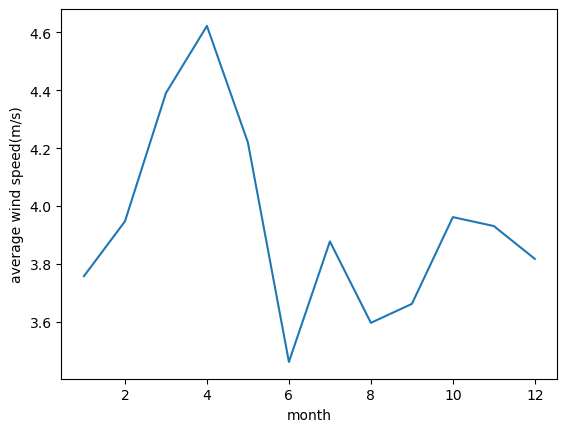

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

weather = pd.read_csv('weather (3).csv', encoding='cp949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month

months = range(1, 13)
monthly_wind = []

for m in months:
    month_df = weather[weather['month'] == m]
    monthly_wind.append(month_df['평균풍속'].mean())

plt.plot(months, monthly_wind)
plt.xlabel('month')
plt.ylabel('average wind speed(m/s)')
plt.show()

### 특정한 값에 기반하여 묶는 기능 : 그룹핑

In [35]:
weather.columns

Index(['일시', '평균기온', '최대풍속', '평균풍속', 'month'], dtype='object')

In [37]:
weather['month'].unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7])

In [41]:
for m, df in weather.groupby('month'):
    print(m, df)

1               일시  평균기온  최대풍속  평균풍속  month
153   2011-01-01   0.8  19.0  11.1      1
154   2011-01-02   0.1   8.5   6.0      1
155   2011-01-03  -0.3  10.2   6.5      1
156   2011-01-04   1.7   6.8   3.1      1
157   2011-01-05   1.2   6.9   4.1      1
...          ...   ...   ...   ...    ...
3466  2020-01-27   5.4  15.3   7.6      1
3467  2020-01-28   5.7  14.9  11.6      1
3468  2020-01-29   4.1   9.0   6.6      1
3469  2020-01-30   1.8  10.2   7.7      1
3470  2020-01-31   1.9  10.2   5.3      1

[310 rows x 5 columns]
2               일시  평균기온  최대풍속  평균풍속  month
184   2011-02-01   3.1   4.9   2.0      2
185   2011-02-02   4.5   5.3   2.5      2
186   2011-02-03   5.4   4.5   2.4      2
187   2011-02-04   5.3   9.1   3.5      2
188   2011-02-05   3.8   6.5   2.4      2
...          ...   ...   ...   ...    ...
3495  2020-02-25   6.6  12.2   6.5      2
3496  2020-02-26   3.6  10.8   7.2      2
3497  2020-02-27   2.0  11.2   5.9      2
3498  2020-02-28   4.1   6.6   2.3      2
3499  

In [44]:
import matplotlib.pyplot as plt

avg_monthly_wind = weather.groupby('month').mean()['평균풍속']

avg_monthly_wind.plot(kind='bar')
plt.ylabel('wind speed(m/s)')
plt.show()

TypeError: Could not convert 2011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-082016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312018-01-012018-01-022018-01-032018-01-042018-01-052018-01-062018-01-072018-01-082018-01-092018-01-102018-01-112018-01-122018-01-132018-01-142018-01-152018-01-162018-01-172018-01-182018-01-192018-01-202018-01-212018-01-222018-01-232018-01-242018-01-252018-01-262018-01-272018-01-282018-01-292018-01-302018-01-312019-01-012019-01-022019-01-032019-01-042019-01-052019-01-062019-01-072019-01-082019-01-092019-01-102019-01-112019-01-122019-01-132019-01-142019-01-152019-01-162019-01-172019-01-182019-01-192019-01-202019-01-212019-01-222019-01-232019-01-242019-01-252019-01-262019-01-272019-01-282019-01-292019-01-302019-01-312020-01-012020-01-022020-01-032020-01-042020-01-052020-01-062020-01-072020-01-082020-01-092020-01-102020-01-112020-01-122020-01-132020-01-142020-01-152020-01-162020-01-172020-01-182020-01-192020-01-202020-01-212020-01-222020-01-232020-01-242020-01-252020-01-262020-01-272020-01-282020-01-292020-01-302020-01-31 to numeric

In [45]:
import csv

f = open('weather (4).csv')
data = csv.reader(f)
data = [field for field in data]
f.close()

In [46]:
data

[['일시', '평균기온', '최대풍속', '평균풍속'],
 ['2010-08-01', '28.7', '8.3', '3.4'],
 ['2010-08-02', '25.2', '8.7', '3.8'],
 ['2010-08-03', '22.1', '6.3', '2.9'],
 ['2010-08-04', '25.3', '6.6', '4.2'],
 ['2010-08-05', '27.2', '9.1', '5.6'],
 ['2010-08-06', '26.8', '9.8', '8'],
 ['2010-08-07', '27.5', '9.1', '5'],
 ['2010-08-08', '26.6', '5.9', '4'],
 ['2010-08-09', '26.9', '5.1', '3.1'],
 ['2010-08-10', '25.6', '10.2', '5.5'],
 ['2010-08-11', '24.6', '9.4', '4.8'],
 ['2010-08-12', '23.7', '8.7', '2.6'],
 ['2010-08-13', '24.3', '10.9', '4.6'],
 ['2010-08-14', '25', '10.8', '4.4'],
 ['2010-08-15', '24.5', '16.9', '10.3'],
 ['2010-08-16', '26.2', '9.8', '3.2'],
 ['2010-08-17', '23.9', '4.2', '1.6'],
 ['2010-08-18', '23.4', '4.2', '2.1'],
 ['2010-08-19', '24.3', '4', '1.9'],
 ['2010-08-20', '25.4', '5', '3.2'],
 ['2010-08-21', '27.8', '7.6', '4.2'],
 ['2010-08-22', '28.3', '5.9', '2.5'],
 ['2010-08-23', '28.9', '9.3', '6.2'],
 ['2010-08-24', '27.5', '8.3', '3'],
 ['2010-08-25', '24.7', '6.8', '1.9'],
 

In [47]:
import pandas as pd

weather = pd.read_csv('weather (4).csv', encoding='cp949')
weather

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [48]:
import pandas as pd

df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                    'b':['b0','b1','b2','b3'],
                    'c':['c0','c1','c2','c3']},
                    index = [0, 1, 2, 3])

df2 = pd.DataFrame({'b':['b2','b3','b4','b5'],
                    'c':['c2','c3','c4','c5'],
                    'd':['d2','d3','d4','d5']},
                    index = [2, 3, 4, 5])